<a href="https://colab.research.google.com/github/chw8207/image_python/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D%26%ED%95%98%EC%9D%B4%ED%8D%BC%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0%ED%8A%9C%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import tensorflow as tf
from sklearn.datasets import make_blobs
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation, Flatten, Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import regularizers, optimizers
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### GPU 설정

In [2]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0' :
    raise SystemError('GPU device not found')
print(f'Found GPU at: {device_name}')

Found GPU at: /device:GPU:0


In [3]:
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11796215995663506026
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14626652160
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2989729227142906674
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


### 신경망의 구성, 학습, 평가 실습

In [ ]:
# 데이터셋 생성하기
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)

In [ ]:
y

array([2, 2, 2, 0, 1, 0, 1, 1, 2, 2, 1, 0, 1, 0, 0, 1, 2, 2, 1, 1, 2, 0,
       0, 2, 1, 1, 2, 2, 0, 1, 0, 0, 1, 2, 1, 0, 0, 1, 2, 0, 2, 1, 1, 2,
       1, 0, 0, 1, 1, 0, 0, 2, 0, 2, 2, 2, 2, 0, 1, 1, 2, 0, 2, 0, 0, 1,
       0, 1, 2, 0, 1, 1, 1, 2, 1, 2, 1, 0, 2, 2, 2, 0, 1, 2, 0, 1, 2, 2,
       1, 1, 2, 0, 2, 0, 0, 2, 1, 0, 2, 0, 2, 2, 2, 1, 1, 1, 1, 0, 0, 2,
       0, 2, 1, 2, 0, 0, 0, 0, 1, 2, 0, 2, 0, 1, 0, 2, 2, 0, 2, 0, 2, 0,
       0, 0, 1, 0, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 0, 1, 2, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 2, 2, 1, 0, 1, 0, 1, 1, 1, 1, 2, 2, 0, 2, 2,
       1, 2, 1, 1, 2, 0, 1, 2, 2, 2, 2, 1, 0, 0, 0, 2, 1, 1, 1, 0, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 2, 0, 1, 2, 2, 0, 2, 0, 1, 0, 1,
       1, 2, 2, 0, 2, 0, 1, 0, 2, 1, 2, 2, 1, 2, 2, 1, 2, 0, 1, 2, 0, 1,
       2, 1, 0, 0, 2, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 2,
       2, 0, 1, 0, 2, 1, 1, 0, 0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0,
       1, 0, 2, 2, 2, 1, 2, 0, 1, 1, 1, 0, 2, 0, 1,

In [ ]:
# 레이블에 원-핫 인코딩 적용
y = to_categorical(y)

In [ ]:
y

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
# 데이터셋 분류
n_train = 800
train_X, test_X = X[:n_train, :], X[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]
print(train_X.shape, test_X.shape)

(800, 2) (200, 2)


In [ ]:
model = Sequential()
model.add(Dense(25, input_dim=2, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                75        
                                                                 
 dense_1 (Dense)             (None, 3)                 78        
                                                                 
Total params: 153 (612.00 Byte)
Trainable params: 153 (612.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
hist = model.fit(train_X, train_y, validation_data = (test_X, test_y), epochs=1000, verbose=1)

Epoch 1/1000
25/25 [==============================] - 2s 13ms/step - loss: 0.9251 - accuracy: 0.4663 - val_loss: 0.8094 - val_accuracy: 0.5250
Epoch 2/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.8202 - accuracy: 0.5462 - val_loss: 0.7254 - val_accuracy: 0.6250
Epoch 3/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.7542 - accuracy: 0.6050 - val_loss: 0.6704 - val_accuracy: 0.7000
Epoch 4/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.7127 - accuracy: 0.6513 - val_loss: 0.6367 - val_accuracy: 0.7350
Epoch 5/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.6835 - accuracy: 0.6662 - val_loss: 0.6116 - val_accuracy: 0.7500
Epoch 6/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.6623 - accuracy: 0.6800 - val_loss: 0.5899 - val_accuracy: 0.7500
Epoch 7/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.6450 - accuracy: 0.6938 - val_loss: 0.5744 - val_accuracy: 0.7650
Epoch

In [ ]:
# 모델의 성능 평가하기
_, train_acc = model.evaluate(train_X, train_y)
_, test_acc = model.evaluate(test_X, test_y)
print('Train: %.3f, Test: %.3f' %(train_acc, test_acc))

7/7 [==============================] - 0s 3ms/step - loss: 0.3797 - accuracy: 0.8350
Train: 0.835, Test: 0.835


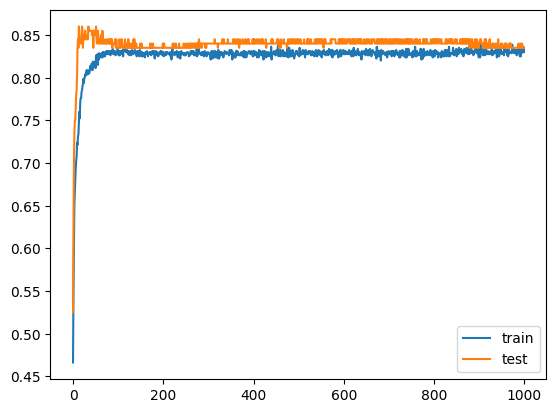

In [ ]:
# 정확도를 기준으로 모델의 학습 곡선 그리기
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='test')
plt.legend()
plt.show()



```python
# L2규제화
model.add(Dense(units=16, kernel_regularizer=regularizers.l2(lambda), acitivation='relu')
```





```python
# 이미지 강화
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

datagen.fit(training_set)
```



- 신경망에 배치 정규화층 추가하기



```python
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

model = Sequential()

model.add(Dense(hidden_units, activation='relu'))

model.add(BatchNormalization())

model.add(Dropout(0.5))

model.add(Dense(units, activation='relu'))

model.add(BatchNormalization())

model.add(Dense(2, activation='softmax'))
```



### 이미지 분류 정확도 개선하기

2. 데이터 준비

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

(X_train, X_valid) = X_train[5000:], X_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

170498071/170498071 [==============================] - 4s 0us/step


In [5]:
# 모양 확인하기
print('X_train = ', X_train.shape)
print('X_valid = ', X_valid.shape)
print('X_test = ', X_test.shape)

X_train =  (45000, 32, 32, 3)
X_valid =  (5000, 32, 32, 3)
X_test =  (10000, 32, 32, 3)


In [6]:
# 데이터 정규화
mean = np.mean(X_train, axis=(0,1,2,3))
std = np.std(X_train, axis=(0,1,2,3))
X_train = (X_train - mean) / (std + 1e-7)
X_valid = (X_valid - mean) / (std + 1e-7)
X_test = (X_test - mean) / (std + 1e-7)

In [7]:
# 원-핫 인코딩 적용하기
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_valid = to_categorical(y_valid, num_classes)
y_test = to_categorical(y_test, num_classes)

In [11]:
# 데이터 강화하기
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)

## 훈련 데이터를 대상으로 변환된 데이터 생성하기
datagen.fit(X_train)

3. 모델 구조 정의

In [16]:
base_hidden_units = 32 # 은닉층의 유닛 수 정의
weight_decay = 1e-4    # L2 규제화 파라미터 lambda
model = Sequential()

# CONV1
model.add(Conv2D(base_hidden_units,kernel_size=3, padding='same', kernel_regularizer=regularizers.l2(weight_decay),
                 input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

# CONV2
model.add(Conv2D(base_hidden_units, kernel_size=3, padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

# POOL + Dropout
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# CONV3
model.add(Conv2D(base_hidden_units*2, kernel_size=3, padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

# CONV4
model.add(Conv2D(base_hidden_units*2, kernel_size=3, padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

# POOL + Dropout
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

# CONV5
model.add(Conv2D(base_hidden_units*4, kernel_size=3, padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

# CONV6
model.add(Conv2D(base_hidden_units*4, kernel_size=3, padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

# POOL + Dropout
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

# FC7
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                       

4. 모델 학습하기

In [30]:
batch_size = 128
epochs = 125

checkpointer = ModelCheckpoint(filepath='model.100epochs.hdf5', verbose=1, save_best_only=True)

# 초기 학습률과 지수적 감소를 위한 설정
initial_learning_rate = 0.0001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

# optimizer = keras.optimizers.Adam(lr=0.0001, decay=1e-6)
optimizer = Adam(learning_rate=lr_schedule)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

hist = model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size), callbacks=[checkpointer],
                           steps_per_epoch=X_train.shape[0]//batch_size, epochs=epochs,
                           verbose=2, validation_data=(X_valid, y_valid))

<ipython-input-30-33cad72f9d68>:19: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size), callbacks=[checkpointer],


Epoch 1/125

Epoch 1: val_loss improved from inf to 2.00335, saving model to model.100epochs.hdf5
351/351 - 36s - loss: 2.8670 - accuracy: 0.2617 - val_loss: 2.0034 - val_accuracy: 0.2962 - 36s/epoch - 102ms/step
Epoch 2/125


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 2.00335 to 1.49578, saving model to model.100epochs.hdf5
351/351 - 26s - loss: 2.1384 - accuracy: 0.3513 - val_loss: 1.4958 - val_accuracy: 0.4914 - 26s/epoch - 73ms/step
Epoch 3/125

Epoch 3: val_loss improved from 1.49578 to 1.45193, saving model to model.100epochs.hdf5
351/351 - 26s - loss: 1.9029 - accuracy: 0.4007 - val_loss: 1.4519 - val_accuracy: 0.4962 - 26s/epoch - 73ms/step
Epoch 4/125

Epoch 4: val_loss improved from 1.45193 to 1.41017, saving model to model.100epochs.hdf5
351/351 - 26s - loss: 1.7497 - accuracy: 0.4364 - val_loss: 1.4102 - val_accuracy: 0.5042 - 26s/epoch - 73ms/step
Epoch 5/125

Epoch 5: val_loss improved from 1.41017 to 1.37609, saving model to model.100epochs.hdf5
351/351 - 27s - loss: 1.6293 - accuracy: 0.4669 - val_loss: 1.3761 - val_accuracy: 0.5174 - 27s/epoch - 76ms/step
Epoch 6/125

Epoch 6: val_loss improved from 1.37609 to 1.33284, saving model to model.100epochs.hdf5
351/351 - 25s - loss: 1.5465 - accuracy: 0.493

5. 모델 평가하기

In [31]:
scores = model.evaluate(X_test, y_test, batch_size=128, verbose=1)
print('\nTest result: %.3f loss: %.3f' %(scores[1]*100, scores[0]))

79/79 [==============================] - 1s 11ms/step - loss: 0.5033 - accuracy: 0.8489

Test result: 84.890 loss: 0.503


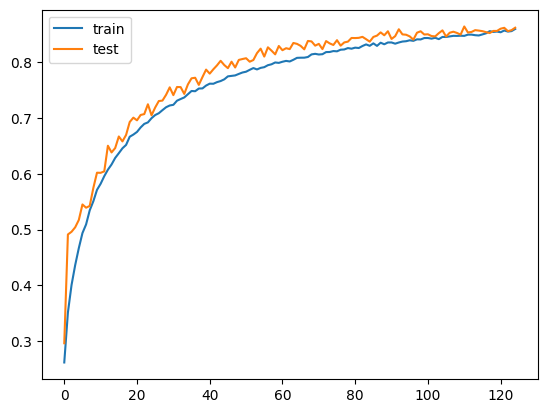

In [34]:
# 학습 곡선
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='test')
plt.legend()
plt.show()